<a href="https://colab.research.google.com/github/NotAbdelrahmanelsayed/Hands-on-machine-learning/blob/main/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Simple linear Regression

In [ ]:
X = np.random.randn(100, 1)
y = 4+3 * X + np.random.randn(100, 1)

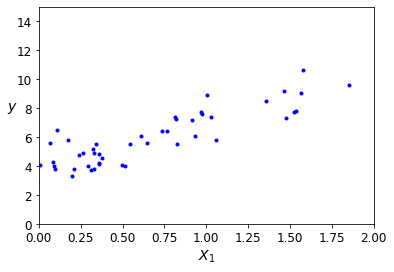

In [ ]:
plt.plot(X, y, "b.") # b. to plot the data in these circle dots
plt.xlabel('$X_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([0, 2, 0, 15])
plt.show();

In [ ]:
X_b = np.c_[np.ones((100,1)), X] # add x0 =1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.00742783],
       [2.85674284]])

In [ ]:
# make our prediction using theta_best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 for each istance
y_predict = X_new_b.dot(theta_best)

In [ ]:
y_predict

array([[4.00742783],
       [9.72091351]])

plot the model's prediction

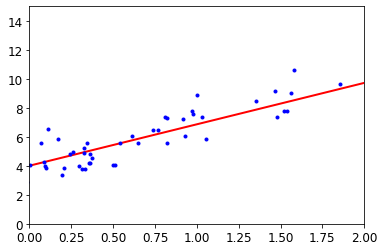

In [ ]:
plt.plot(X_new, y_predict, 'r-', linewidth = 2 ) #  plot the red line with ---- 
plt.plot(X, y, 'b.') # plot the data with blue circles
plt.axis([0, 2, 0, 15])
plt.show();

## what about make same model using sickit learn ♥


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[4.00742783],
       [9.72091351]])

### Stochastic Gradient Descent  
> **The power of Stochastic Gradienet Descent**  

**we use this algorithm to minimize the cost function in a fast way and able to use them in a large data set because this algorithm pick a random instance from the training set and compute the gradiants, which will make it work faster cause of manipulating few data**

> **The weakness of Stochastic Gradienet Descent**

**the algorithm woudn't stop in the optimal minimum like Batch Gradient Decent , Its alyawes go up an down even if it's reaches the minimum the algorithm well Stop with very good parameters but not the Global optimum**


In [ ]:
np.random.seed(42)

In [ ]:

n_epoch = 50 
t0, t1 = 5, 50 # learning schedual

def learning_schedual(t): 
  return t0/(t + t1 )
theta = np.random.randn(2,1) # random array for theta

In [ ]:

m = len(X_b)
for epoch in range(n_epoch):
  for i in range(m) :
      random_index = np.random.randint(m)
      xi = X_b[random_index : random_index+1]
      yi = y[random_index : random_index+1]
      gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
      eta = learning_schedual(epoch * m + i)
      theta = theta - eta * gradients

In [ ]:
theta

array([[4.04895841],
       [2.89159372]])

**pretty good solution but as we know not the global optimum   
using normal equation    
theta = ([4.00742783],
       [2.85674284])  
       still very closer**

### SGD using sickit learn 

In [ ]:
# import the model
from sklearn.linear_model import SGDRegressor

In [ ]:
 # max_iter for num of iterations , penalty > regularization , tol > run till the loss drops by less than 0.001
sgd_reg = SGDRegressor(max_iter = 1000 , tol = 1e-3, penalty = None, eta0 = 0.1)

sgd_reg.fit(X,y.ravel() ) # using ravel to convert the 2d array to 1d array 

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.97793535]), array([2.91147283]))

**sickit learn make life so easy xD**


### Mini-batch Gradient Descent
**little breif about mini-batch we can tell it's a compination of Batche GD and Stochastic GD it's computing in each step a small random set's of instance "mini-batches" instead of working on the whole instance or single instance in each step,**

# Polynomial Regression

In [ ]:
#Data to figure what is polynomial
m = 100 
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + 2 + np.random.randn(m, 1)

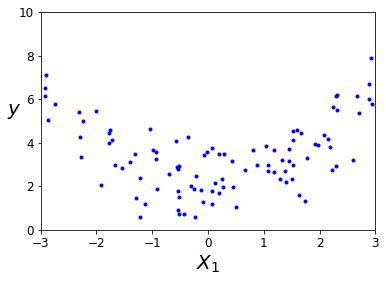

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel('$X_1$', fontsize = 20)
plt.ylabel('$y$', rotation = 0, fontsize = '20')
plt.axis([-3, 3, 0, 10])
plt.show()

**the street line will never fit to this data so we need to use polynomial**  


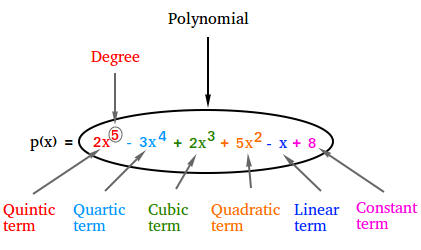

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_feat.fit_transform(X)
print('X before transform', X[0])
print('\nX after Transform', X_poly[0])

X before transform [1.97322766]

X after Transform [1.97322766 3.89362739]


**now the data ready to fit**

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.19573036]), array([[0.00978737, 0.4681429 ]]))

**lets take a look at the fitted line** 

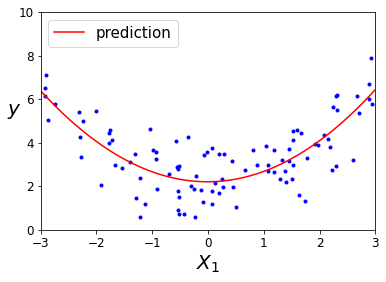

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_feat.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', label='prediction')
plt.xlabel('$X_1$', fontsize = 20)
plt.ylabel('$y$', rotation = 0, fontsize = '20')
plt.legend(loc='upper left', fontsize=15)
plt.axis([-3, 3, 0, 10])
plt.show()

### Trade off (The Bias/Variance)
**the trade off problem can reach us to overfitting or underfitting the model**   
**The high Bias make a gap between the predicted value and actual value that's under fitting to make a good model we need to make sure we have low bias**  
**the high variance cause overfetting to the data maybe because we trained irrelevant data, or trained the data with some noise.**  
**so the best accurate model will have a low bias and low variance**  

[refrence medium article ](https://medium.com/@themachinelearningblog/bias-variance-trade-off-in-machine-learning-713358e514b9)

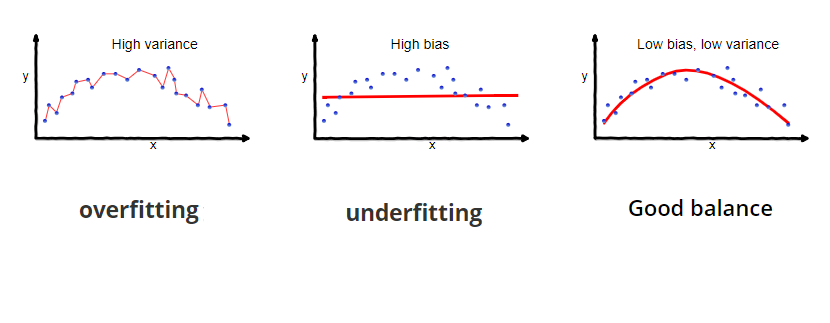